## Zadanie 1
### a)

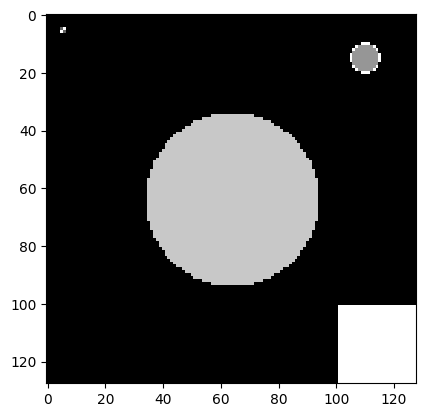

In [4]:
import numpy as np
from matplotlib import pyplot as plt

# tworzymy tablice o wymiarach 128x128x3 (3 kanaly to RGB)
# uzupelnioną zerami = kolor czarny
data = np.zeros((128, 128, 3), dtype=np.uint8)
# każdy piksel ma trzy kanały (RGB), obrazek jest 128x128
# 0,0,0 = czarny
# 255,255,255 = biały
# 100,100,100 = szary


# chcemy zeby obrazek byl czarnobialy,
# wiec wszystkie trzy kanaly rgb uzupelniamy tymi samymi liczbami
# napiszmy do tego funkcje
def draw(img, x, y, color):
    img[x, y] = [color, color, color]


# zamalowanie 4 pikseli w lewym górnym rogu
draw(data, 5, 5, 100)
draw(data, 6, 6, 100)
draw(data, 5, 6, 255)
draw(data, 6, 5, 255)


# rysowanie kilku figur na obrazku
for i in range(128):
    for j in range(128):
        if (i-64)**2 + (j-64)**2 < 900:
            draw(data, i, j, 200)
        elif i > 100 and j > 100:
            draw(data, i, j, 255)
        elif (i-15)**2 + (j-110)**2 < 25:
            draw(data, i, j, 150)
        elif (i-15)**2 + (j-110)**2 == 25 or (i-15)**2 + (j-110)**2 == 26:
            draw(data, i, j, 255)

# konwersja macierzy na obrazek i wyświetlenie
plt.imshow(data, interpolation='nearest')
plt.show()

### b)

In [5]:
# zwraca macierz w wymiarze [n, n, 3], ale obrazek jest czarno-biały i działa dla krawędzi poziomych
def apply_kernel(img, kernel, stride):
    obrazek = np.zeros((int((len(img)-2)/stride), int((len(img)-2)/stride), 3), dtype=np.uint8)
    #draw(img, x, y, color)
    for l in range(3):
        for i in range(0, len(img)-3, stride):
            j = -i
            while i+3+j <= len(img)-3:
                obrazek[int(i/stride), int((j+i)/stride), l] = np.sum(np.multiply(img[i:i+3,j+i:i+j+3,l], kernel))
                j += stride
    return obrazek

In [6]:
# Convolution Operation on Volume
# obrazek wychodzi kolorowy, nie działa dla poziomych krawędzi
def apply_kernel2(img, kernel, stride):
    obrazek = np.zeros((int((len(img)-2)/stride), int((len(img)-2)/stride)), dtype=np.uint8)
    #draw(img, x, y, color)
    for i in range(0, len(img)-3, stride):
        j = -i
        while i+3+j <= len(img)-3:
            obrazek[int(i/stride), int((j+i)/stride)] = np.sum(np.multiply(img[i:i+3,j+i:i+j+3], kernel))
            j += stride
    return obrazek

[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]] is a kernel for detecting vertical edges


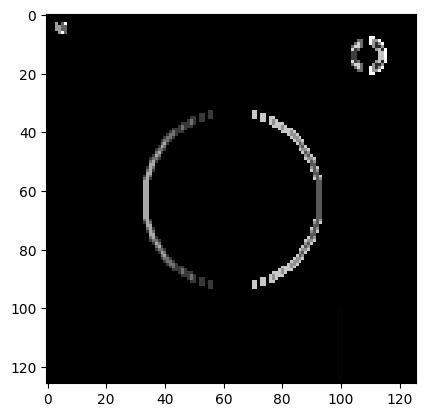

In [7]:
kernel_vertical = np.array([[1, 0, -1],[1, 0, -1],[1, 0, -1]])
print(kernel_vertical, 'is a kernel for detecting vertical edges')

img1 = apply_kernel(data, kernel_vertical, 1)

# Visualizing img1
plt.imshow(img1, interpolation='nearest')
plt.show()

### c)

[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]] is a kernel for detecting vertical edges


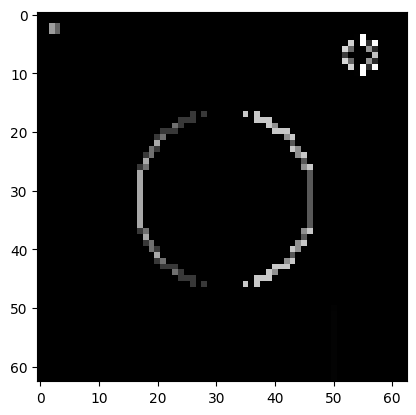

In [8]:
kernel_vertical = np.array([[1, 0, -1],[1, 0, -1],[1, 0, -1]])
print(kernel_vertical, 'is a kernel for detecting vertical edges')

img12 = apply_kernel(data, kernel_vertical, 2)

# Visualizing img12
plt.imshow(img12, interpolation='nearest')
plt.show()

### d)

[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]] is a kernel for detecting horizontal edges


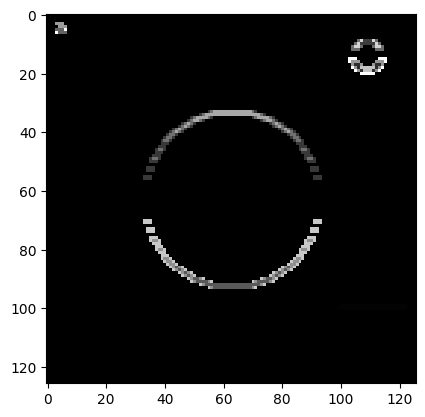

In [9]:
kernel_horizontal = np.array([[1, 1, 1],[0, 0, 0],[-1, -1, -1]])
print(kernel_horizontal, 'is a kernel for detecting horizontal edges')

img2 = apply_kernel(data, kernel_horizontal, 1)

# Visualizing img2
plt.imshow(img2, interpolation='nearest')
plt.show()

[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]] is a kernel for detecting horizontal edges


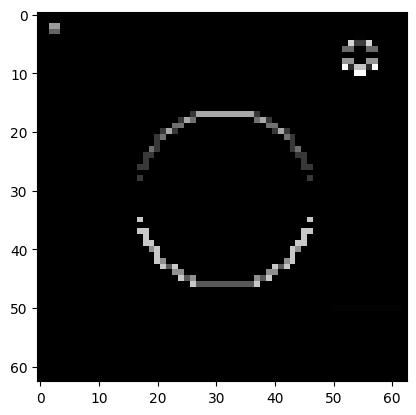

In [10]:
kernel_horizontal = np.array([[1, 1, 1],[0, 0, 0],[-1, -1, -1]])
print(kernel_horizontal, 'is a kernel for detecting horizontal edges')

img22 = apply_kernel(data, kernel_horizontal, 2)

# Visualizing img22
plt.imshow(img22, interpolation='nearest')
plt.show()

In [11]:
np.shape(img22)

(63, 63, 3)

### e)

[[ 0  1  2]
 [-1  0  1]
 [-2 -1  0]] is a kernel for detecting diagonal edges (45 angle)


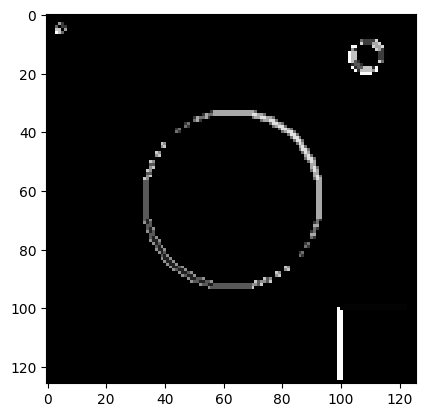

In [12]:
kernel_sobel1 = np.array([[0, 1, 2],[-1, 0, 1],[-2, -1, 0]])
print(kernel_sobel1, 'is a kernel for detecting diagonal edges (45 angle)')

img3 = apply_kernel(data, kernel_sobel1, 1)

# Visualizing img3
plt.imshow(img3, interpolation='nearest')
plt.show()

[[ 0  1  2]
 [-1  0  1]
 [-2 -1  0]] is a kernel for detecting diagonal edges (45 angle)


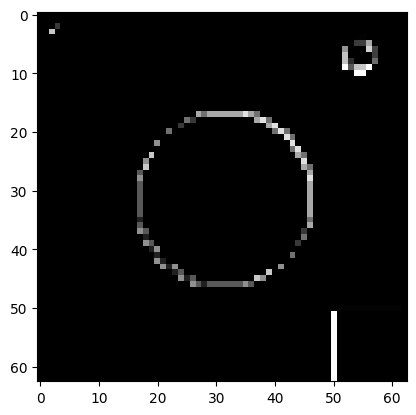

In [13]:
kernel_sobel1 = np.array([[0, 1, 2],[-1, 0, 1],[-2, -1, 0]])
print(kernel_sobel1, 'is a kernel for detecting diagonal edges (45 angle)')

img32 = apply_kernel(data, kernel_sobel1, 2)

# Visualizing img32
plt.imshow(img32, interpolation='nearest')
plt.show()

[[ 2  1  0]
 [ 1  0 -1]
 [ 0 -1 -2]] is a kernel for detecting diagonal edges (135 angle)


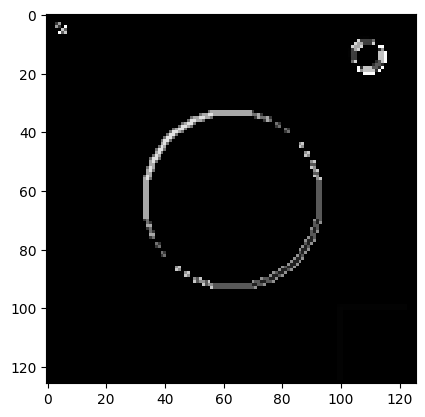

In [14]:
kernel_sobel2 = np.array([[2, 1, 0],[1, 0, -1],[0, -1, -2]])
print(kernel_sobel2, 'is a kernel for detecting diagonal edges (135 angle)')

img33 = apply_kernel(data, kernel_sobel2, 1)

# Visualizing img33
plt.imshow(img33, interpolation='nearest')
plt.show()

[[ 2  1  0]
 [ 1  0 -1]
 [ 0 -1 -2]] is a kernel for detecting diagonal edges (135 angle)


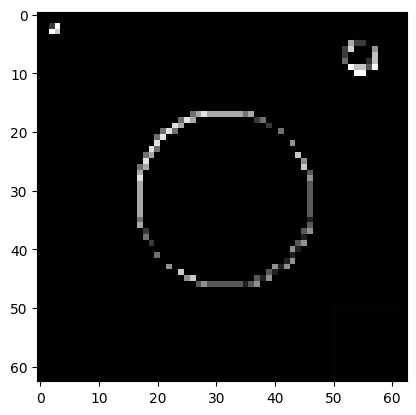

In [15]:
kernel_sobel2 = np.array([[2, 1, 0],[1, 0, -1],[0, -1, -2]])
print(kernel_sobel2, 'is a kernel for detecting diagonal edges (135 angle)')

img34 = apply_kernel(data, kernel_sobel2, 2)

# Visualizing img34
plt.imshow(img34, interpolation='nearest')
plt.show()

[[ 0 -1 -2]
 [ 1  0 -1]
 [ 2  1  0]] is a kernel for detecting diagonal edges (225 angle)


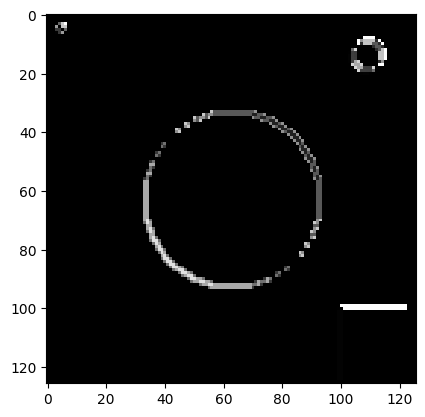

In [16]:
kernel_sobel3 = kernel_sobel1*(-1)
print(kernel_sobel3, 'is a kernel for detecting diagonal edges (225 angle)')

img35 = apply_kernel(data, kernel_sobel3, 1)

# Visualizing img35
plt.imshow(img35, interpolation='nearest')
plt.show()

[[ 0 -1 -2]
 [ 1  0 -1]
 [ 2  1  0]] is a kernel for detecting diagonal edges (225 angle)


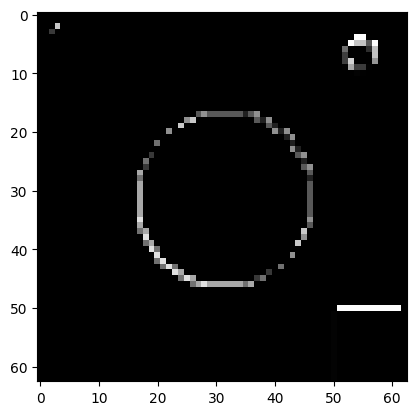

In [17]:
kernel_sobel3 = kernel_sobel1*(-1)
print(kernel_sobel3, 'is a kernel for detecting diagonal edges (225 angle)')

img36 = apply_kernel(data, kernel_sobel3, 2)

# Visualizing img36
plt.imshow(img36, interpolation='nearest')
plt.show()

[[-2 -1  0]
 [-1  0  1]
 [ 0  1  2]] is a kernel for detecting diagonal edges (315 angle)


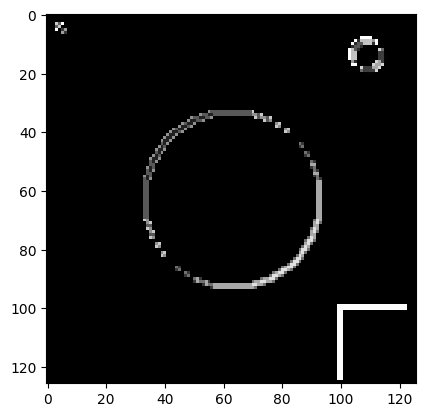

In [18]:
kernel_sobel4 = kernel_sobel2*(-1)
print(kernel_sobel4, 'is a kernel for detecting diagonal edges (315 angle)')

img37 = apply_kernel(data, kernel_sobel4, 1)

# Visualizing img37
plt.imshow(img37, interpolation='nearest')
plt.show()

[[-2 -1  0]
 [-1  0  1]
 [ 0  1  2]] is a kernel for detecting diagonal edges (315 angle)


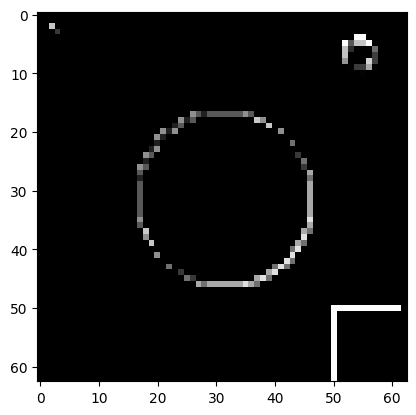

In [19]:
kernel_sobel4 = kernel_sobel2*(-1)
print(kernel_sobel4, 'is a kernel for detecting diagonal edges (315 angle)')

img38 = apply_kernel(data, kernel_sobel4, 2)

# Visualizing img38
plt.imshow(img38, interpolation='nearest')
plt.show()

## Zadanie 2
### a) keras

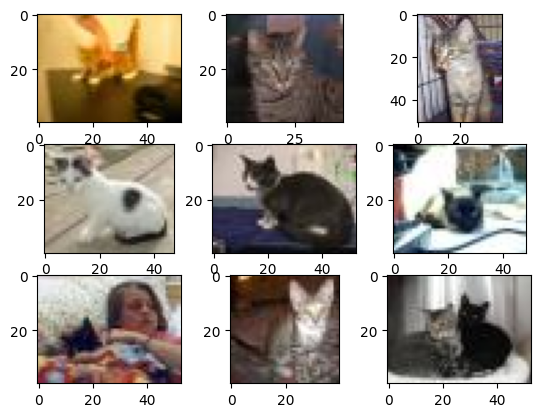

In [2]:
# plot cat photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'train/'
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'cat.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

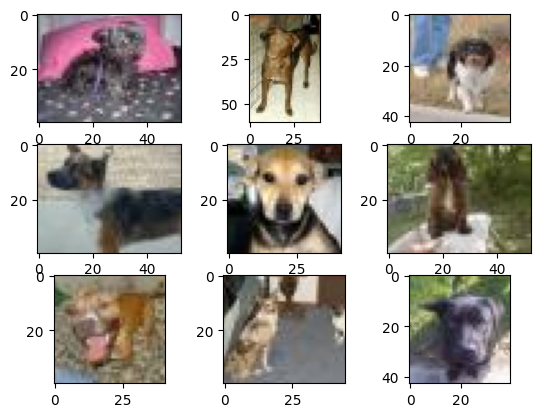

In [3]:
# plot dog photos from the dogs vs cats dataset
# define location of dataset
folder = 'train/'
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'dog.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

### b) i c)

In [19]:
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
# create directories
dataset_home = 'dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
    # create label subdirectories
    labeldirs = ['dogs/', 'cats/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=True)
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = 'train/'
for file in listdir(src_directory):
    src = src_directory + '/' + file
    dst_dir = 'train/'
    if random() < val_ratio:
        dst_dir = 'test/'
    if file.startswith('cat'):
        dst = dataset_home + dst_dir + 'cats/'  + file
        copyfile(src, dst)
    elif file.startswith('dog'):
        dst = dataset_home + dst_dir + 'dogs/'  + file
        copyfile(src, dst)

### d), e), f) i g)

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.
Dokładność na zbiorze testowym: 69.205


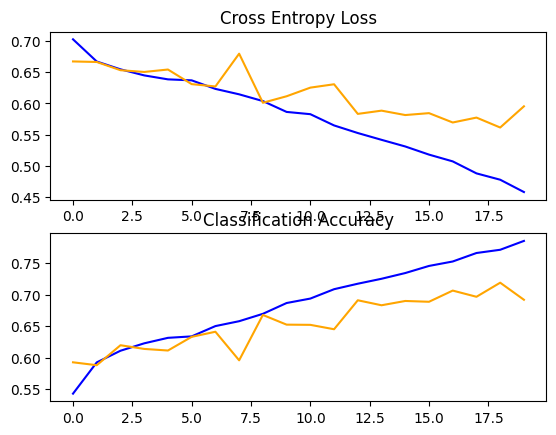

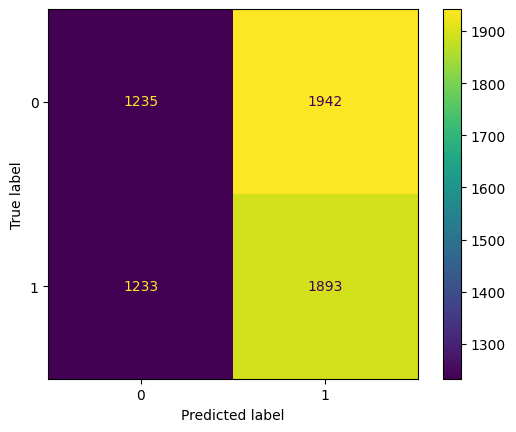

In [20]:
# baseline model for the dogs vs cats dataset
import sys
import numpy as np
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    #pyplot.savefig(filename + '_plot.png')
    pyplot.savefig('plots/plot1.png')
    pyplot.show()
    #pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
        class_mode='binary', batch_size=64, target_size=(200, 200))
    test_it = datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
        class_mode='binary', batch_size=64, target_size=(200, 200))
    # fit model
    history = model.fit(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
    # evaluate model
    _, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
    print('Dokładność na zbiorze testowym: %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    # confusion matrix
    test_labels = test_it.labels
    pred_test = model.predict(test_it, steps=len(test_it), verbose=0)
    test_pred_labels = np.round(pred_test)
    cm = confusion_matrix(test_labels, test_pred_labels)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
    cm_display.plot()
    pyplot.savefig('plots/cmatrix1.png')
    pyplot.show()

# entry point, run the test harness
run_test_harness()

### g)

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.
Dokładność na zbiorze testowym: 67.190


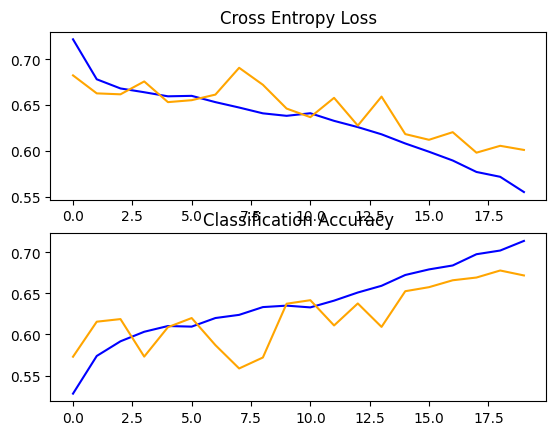

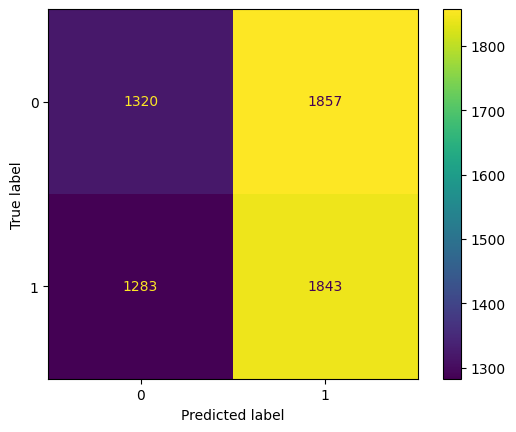

In [4]:
# baseline model for the dogs vs cats dataset
import sys
import numpy as np
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='tanh', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='tanh', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.0)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    #pyplot.savefig(filename + '_plot.png')
    pyplot.savefig('plots/plot2.png')
    pyplot.show()
    #pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
        class_mode='binary', batch_size=64, target_size=(200, 200))
    test_it = datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
        class_mode='binary', batch_size=64, target_size=(200, 200))
    # fit model
    history = model.fit(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
    # evaluate model
    _, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
    print('Dokładność na zbiorze testowym: %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    # confusion matrix
    test_labels = test_it.labels
    pred_test = model.predict(test_it, steps=len(test_it), verbose=0)
    test_pred_labels = np.round(pred_test)
    cm = confusion_matrix(test_labels, test_pred_labels)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
    cm_display.plot()
    pyplot.savefig('plots/cmatrix2.png')
    pyplot.show()

# entry point, run the test harness
run_test_harness()

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.
Dokładność na zbiorze testowym: 49.595


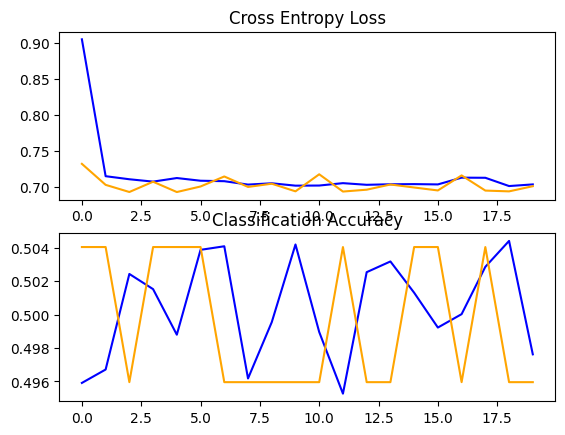

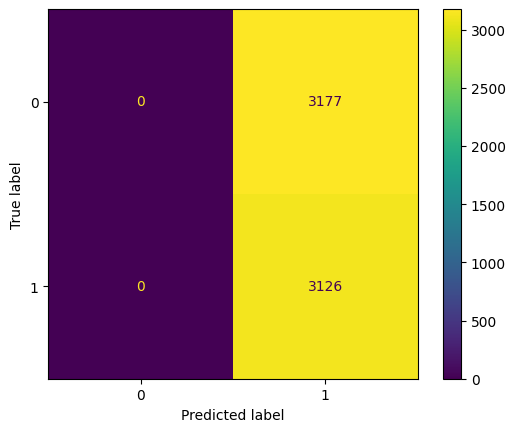

In [5]:
# baseline model for the dogs vs cats dataset
import sys
import numpy as np
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='tanh', kernel_initializer='he_uniform', padding='valid', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='tanh', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = RMSprop(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    #pyplot.savefig(filename + '_plot.png')
    pyplot.savefig('plots/plot3.png')
    pyplot.show()
    #pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
        class_mode='binary', batch_size=64, target_size=(200, 200))
    test_it = datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
        class_mode='binary', batch_size=64, target_size=(200, 200))
    # fit model
    history = model.fit(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
    # evaluate model
    _, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
    print('Dokładność na zbiorze testowym: %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    # confusion matrix
    test_labels = test_it.labels
    pred_test = model.predict(test_it, steps=len(test_it), verbose=0)
    test_pred_labels = np.round(pred_test)
    cm = confusion_matrix(test_labels, test_pred_labels)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
    cm_display.plot()
    pyplot.savefig('plots/cmatrix3.png')
    pyplot.show()

# entry point, run the test harness
run_test_harness()